In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Data processing
import pandas as pd
import numpy as np


# Import VADER sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score

# Set a wider colwith
pd.set_option('display.max_colwidth', 1000)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change directory to a specific folder within your Google Drive
import os
os.chdir("/content/drive/My Drive/NLP_Dede_Ulfah/")  # Update the path as needed

# Print out the current directory
!pwd

Mounted at /content/drive
/content/drive/My Drive/NLP_Dede_Ulfah


In [ ]:
# Path ke file
file_path = "/content/drive/My Drive/NLP_Dede_Ulfah/imdb_labelled.txt"

# Baca file
with open(file_path, 'r') as file:
    data = file.read()

# Sekarang data dari file tersimpan dalam variabel 'data' dan Anda dapat bekerja dengannya.

In [ ]:
# Read in data
imdb_review = pd.read_csv('imdb_labelled.txt', sep='\t', names=['review', 'label'])

# Take a look at the data
imdb_review.head()

,review,label
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1


In [ ]:
# Get the dataset information
imdb_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  748 non-null    object
 1   label   748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [ ]:
imdb_review.head()

,review,label
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1


In [ ]:
# Check the label distribution
imdb_review['label'].value_counts()

1    386
0    362
Name: label, dtype: int64

In [ ]:
# Example text
text = 'GrabNGoInfo.com is a great machine learning tutorial website.'

# VADER Sentiment
vader = SentimentIntensityAnalyzer()
vader_sentiment = vader.polarity_scores(text)

In [ ]:
vader_sentiment

{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}

In [ ]:
# Get sentiment score for each review
vader_sentiment = SentimentIntensityAnalyzer()
imdb_review['scores_VADER'] = imdb_review['review'].apply(lambda s: vader_sentiment.polarity_scores(s)['compound'])

In [ ]:
imdb_review.head(20)

,review,label,scores_VADER
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,-0.4215
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,-0.5507
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0,-0.7178
3,Very little music or anything to speak of.,0,0.0000
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1,0.6369
5,"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",0,-0.2500
6,Wasted two hours.,0,-0.4939
7,"Saw the movie today and thought it was a good effort, good messages for kids.",1,0.7003
8,A bit predictable.,0,0.0000
9,Loved the casting of Jimmy Buffet as the science teacher.,1,0.5994


In [ ]:
# Predict sentiment label for each review
imdb_review['pred_VADER'] = imdb_review['scores_VADER'].apply(lambda x: 1 if x >=0 else 0)
imdb_review.head(20)

,review,label,scores_VADER,pred_VADER
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,-0.4215,0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,-0.5507,0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0,-0.7178,0
3,Very little music or anything to speak of.,0,0.0000,1
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1,0.6369,1
5,"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",0,-0.2500,0
6,Wasted two hours.,0,-0.4939,0
7,"Saw the movie today and thought it was a good effort, good messages for kids.",1,0.7003,1
8,A bit predictable.,0,0.0000,1
9,Loved the casting of Jimmy Buffet as the science teacher.,1,0.5994,1


In [ ]:
# Compare Actual and Predicted
accuracy_score(imdb_review['label'],imdb_review['pred_VADER'])

0.7767379679144385

In [9]:
import matplotlib.pyplot as plt

In [5]:
compound_scores = [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

(array([ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 15.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

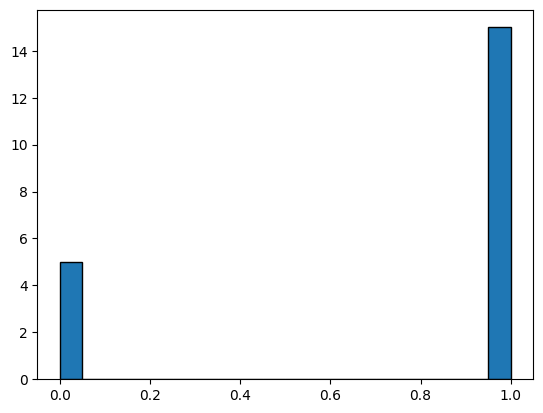

In [10]:
plt.hist(compound_scores, bins=20, edgecolor='black')

Text(0, 0.5, 'N')

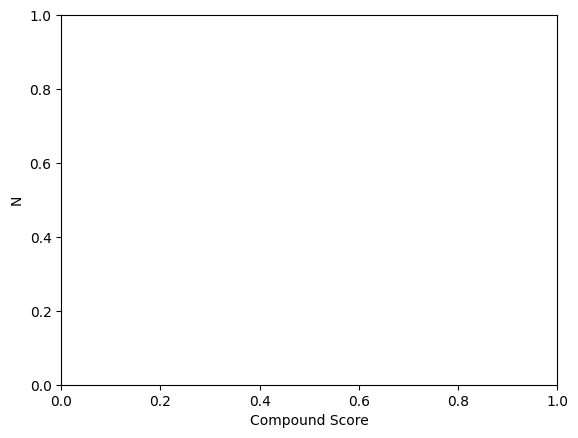

In [11]:
# Atur label sumbu-x dan sumbu-y
plt.xlabel('Compound Score')
plt.ylabel('N')

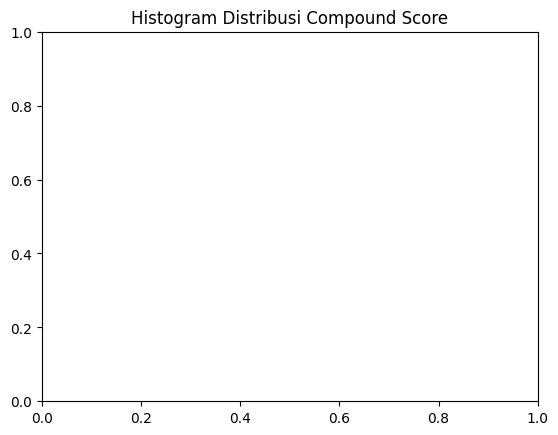

In [13]:
# Menambahkan judul
plt.title('Histogram Distribusi Compound Score')

# Menampilkan plot
plt.show()

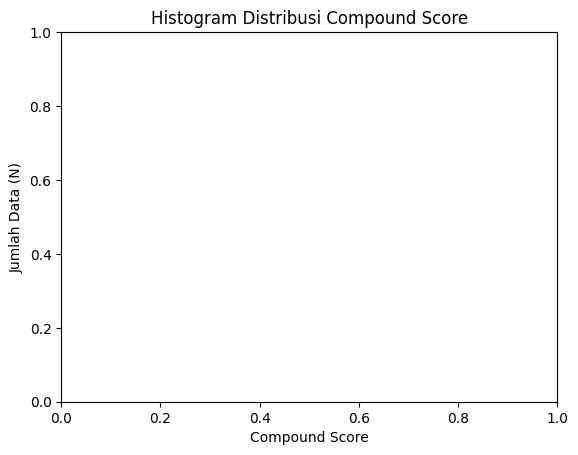

In [14]:
# Menambahkan label sumbu-sumbu
plt.xlabel('Compound Score')
plt.ylabel('Jumlah Data (N)')

# Menambahkan judul
plt.title('Histogram Distribusi Compound Score')

# Menampilkan plot
plt.show()